In [1]:
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

from __future__ import annotations
import re
from egglog import *

In [2]:
egraph = EGraph()

i, j = vars_("i j", i64)

@egraph.class_
class EArray(BaseExpr):
    def __init__(self, x: i64) -> None:
        ...

    # @classmethod
    # def empty(cls) -> EArray:  # type: ignore[empty-body]
    #     ...
    #
    def append(self, others: EArray) -> EArray:  # type: ignore[empty-body]
        ...

    def push(self, value: i64) -> EArray:  # type: ignore[empty-body]
        ...

    # def pop(self) -> List:  # type: ignore[empty-body]
    #     ...

    # def not_contains(self, value: T) -> Unit:  # type: ignore[empty-body]
    #     ...
    #
    # def contains(self, value: T) -> Unit:  # type: ignore[empty-body]
    #     ...

    # def length(self) -> i64:  # type: ignore[empty-body]
    #     ...
    #
    # def __getitem__(self, index: i64Like) -> T:  # type: ignore[empty-body]
    #     ...
    def __add__(self, others: EArray) -> EArray:  # type: ignore[empty-body]
        ...
    def __mul__(self, x: i64) -> EArray:  # type: ignore[empty-body]
        ...

@egraph.register
def _earray(i: i64, j: i64, a1: EArray, a2: EArray, a3: EArray):
    yield rewrite(EArray(i).append(EArray(j))).to(EArray(i).push(j))
    # yield rewrite(EArray(i) + EArray(j)).to(EArray(i).push(j))
    yield rewrite(a1 + (a2 + a3)).to((a1 + a2) + a3)
    yield rewrite((a1 + a2) + a3).to(a1 + (a2 + a3))

    yield rewrite(a1 + a1).to(a1 * i64(2))
    yield rewrite(a1 + a1 * i).to(a1 * (i + 1))

    yield rewrite((a1 * i) * j).to(a1 * (i * j))
    yield rewrite((a1 + a2 * i) * j).to(a1 * j + a2 * (i * j))
    yield rewrite(a1 * i + a2 * i * j).to((a1 + a2 * j) * i)


@egraph.function
def erange(x: i64) -> EArray:  # type: ignore[empty-body]
    ...

@egraph.register
def _erange(x: i64):
    yield rewrite(EArray(i64(0))).to(erange(i64(0)))
    yield rewrite(erange(x).push(x + 1)).to(erange(x + 1))
    yield rewrite(erange(x) + EArray(x + 1)).to(erange(x + 1))

# @egraph.function
# def ereverse(a: EArray) -> EArray:  # type: ignore[empty-body]
#     ...
#
# @egraph.register
# def _ereverse(i: i64):
#     # yield rewrite(EArray(i64(0))).to(erange(i64(0)))
#     yield rewrite(EArray(i64(1)) + EArray(i64(0))).to(ereverse(erange(i64(1))))
#     # yield rewrite(EArray(i64(1)) + EArray(i64(0))).to(ereverse(erange(i64(1))))
#     # yield rewrite(EArray(i64(i + 1)).append(ereverse(erange(i64(i))))).to(erange(i64(0)))
#
#     # yield rewrite(ereverse(erange(i64(0)))).to(EArray(i64(0)))
#     yield rewrite(ereverse(erange(i))).to(EArray(i) + ereverse(erange(i - 1)))
#     # pass

@egraph.function
def ereverse_range(i: i64) -> EArray:  # type: ignore[empty-body]
    ...

@egraph.register
def _ereverse_range(i: i64):
    yield rewrite(EArray(i64(0))).to(ereverse_range(i64(0)))
    yield rewrite(EArray(i) + ereverse_range(i - 1)).to(ereverse_range(i))


In [3]:
# expr = EArray(i64(0)).push(i64(1)).push(i64(2))
# expr = EArray(i64(3)).push(i64(2)).push(i64(1)).push(i64(0))
expr = EArray(i64(3)) + EArray(i64(2)) + EArray(i64(1)) + EArray(i64(0)) + EArray(i64(0)) + EArray(i64(0)) + EArray(i64(0)) + EArray(i64(0))
expr

((((((EArray(3) + EArray(2)) + EArray(1)) + EArray(0)) + EArray(0)) + EArray(0)) + EArray(0)) + EArray(0)

In [4]:
%%time
expr2 = egraph.extract(expr)

egraph.run(20)
# expr2 = egraph.simplify(expr, 30)
expr2 = egraph.extract(expr)
expr2

CPU times: total: 0 ns
Wall time: 2.99 ms


ereverse_range(3) + (EArray(0) * 4)

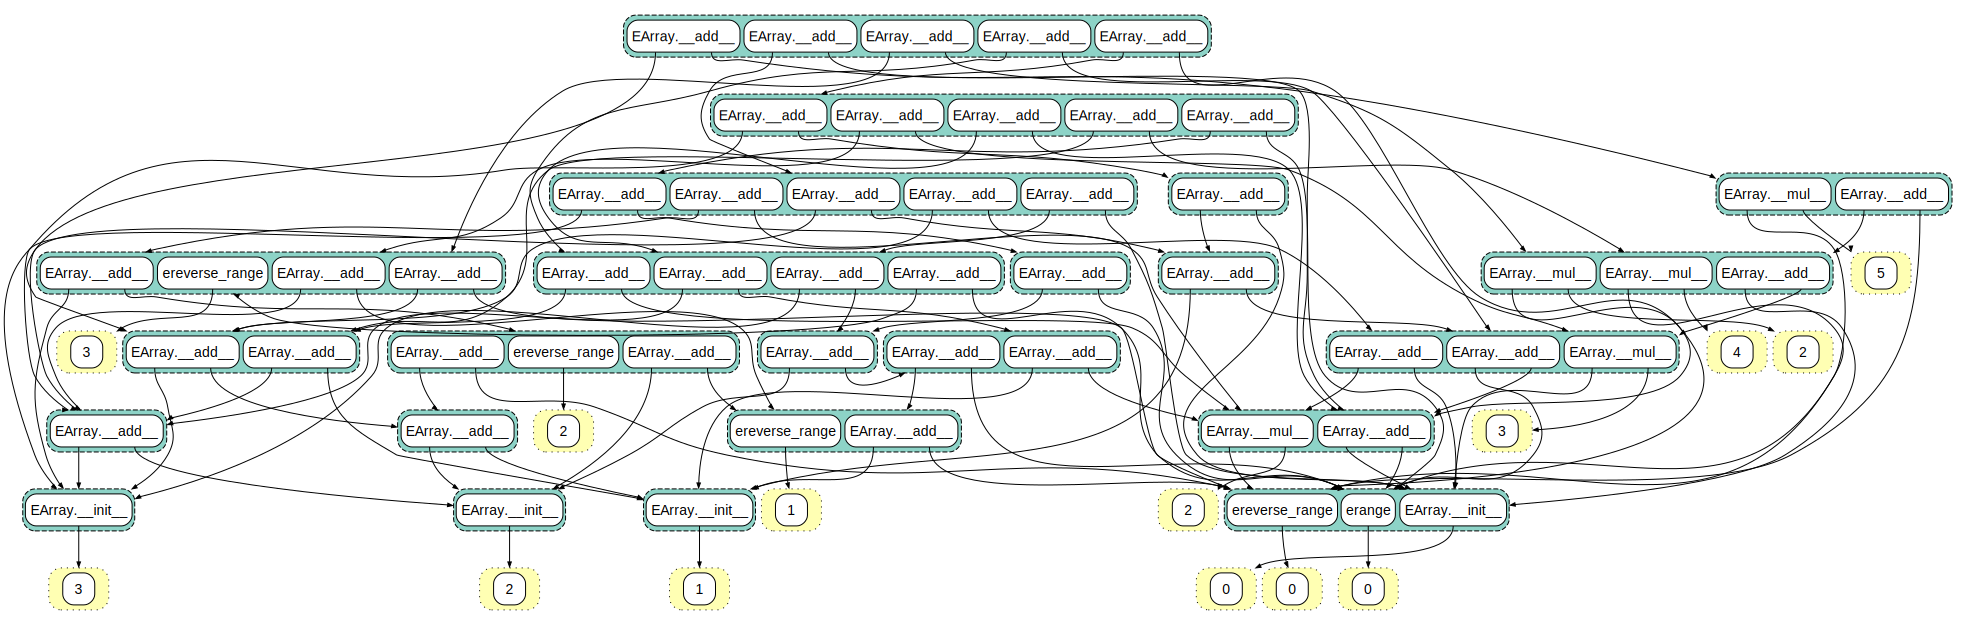

In [5]:
egraph

In [6]:
from egglog.runtime import RuntimeExpr

def to_expr(x: list[int]) -> RuntimeExpr:
    assert (len(x) > 0)
    expr = EArray(i64(x[-1]))
    for val in x[-2::-1]:
        expr = EArray(i64(x[val])) + expr
    return expr


In [7]:
chimpanzee_dna = "ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCATACTCCTGACACTATTTCTCGTCACCCAACTAAAAATATTAAATTCAAATTACCATCTACCCCCCTCACCAAAACCCATAAAAATAAAAAACTACAATAAACCCTGAGAACCAAAATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG"
input = chimpanzee_dna  #[:100]
to_number = {
    'A': 0,
    'C': 1,
    'G': 2,
    'T': 3
}
number_input = [to_number[c] for c in input]
expr_input = egraph.define("expr_input", to_expr(number_input))

In [8]:
%%time
expr2 = egraph.extract(expr_input)

egraph.run(3)
# expr2 = egraph.simplify(expr, 30)
expr2 = egraph.extract(expr_input)
# expr2

CPU times: total: 31.2 ms
Wall time: 41.4 ms


In [9]:
%%time
egraph.run(1)


CPU times: total: 15.6 ms
Wall time: 103 ms


RunReport(True, datetime.timedelta(microseconds=21), datetime.timedelta(microseconds=26), datetime.timedelta(microseconds=54))

In [10]:
expr2 = egraph.extract(expr_input)


In [11]:
expr2

(erange(3) + ((((EArray(3) * 3) + (EArray(0) * 2)) + EArray(3)) + ereverse_range(1))) + (
    (((EArray(0) * 2) + ereverse_range(1)) + (((EArray(3) * 2) + EArray(2)) * 2))
    + (
        (((EArray(1) + erange(2)) + EArray(0)) + (EArray(3) + (((EArray(3) * 2) + EArray(0)) * 2)))
        + (
            (ereverse_range(1) + (erange(1) + (ereverse_range(1) + EArray(3))))
            + (
                (((EArray(3) * 4) + erange(1)) + ((EArray(0) + EArray(3)) + ((EArray(1) + ((EArray(3) * 2) + EArray(1))) + EArray(2))))
                + (
                    ((EArray(0) + EArray(3)) * 2)
                    + (
                        (ereverse_range(1) + (EArray(1) * 2))
                        + (
                            ((EArray(1) + EArray(3)) * 2)
                            + (
                                (EArray(2) + (EArray(1) + (((EArray(3) + EArray(0)) + (EArray(3) * 3)) + (EArray(0) * 2))))
                                + (
                                    ((EArr

In [12]:
expr2

(erange(3) + ((((EArray(3) * 3) + (EArray(0) * 2)) + EArray(3)) + ereverse_range(1))) + (
    (((EArray(0) * 2) + ereverse_range(1)) + (((EArray(3) * 2) + EArray(2)) * 2))
    + (
        (((EArray(1) + erange(2)) + EArray(0)) + (EArray(3) + (((EArray(3) * 2) + EArray(0)) * 2)))
        + (
            (ereverse_range(1) + (erange(1) + (ereverse_range(1) + EArray(3))))
            + (
                (((EArray(3) * 4) + erange(1)) + ((EArray(0) + EArray(3)) + ((EArray(1) + ((EArray(3) * 2) + EArray(1))) + EArray(2))))
                + (
                    ((EArray(0) + EArray(3)) * 2)
                    + (
                        (ereverse_range(1) + (EArray(1) * 2))
                        + (
                            ((EArray(1) + EArray(3)) * 2)
                            + (
                                (EArray(2) + (EArray(1) + (((EArray(3) + EArray(0)) + (EArray(3) * 3)) + (EArray(0) * 2))))
                                + (
                                    ((EArr

In [ ]:
import re
re.sub(r'Nuc\("([ACTG])"\)', r'\1', str(expr_sim_expr_input).replace(' ', '').replace('\n', ''))

In [39]:
output = str(expr2).replace(' ', '').replace('\n', '')

mapping = "ACGT"
for i, c in enumerate(mapping):
    output = output.replace(f"EArray({i})", c)
    output = output.replace(f"erange({i})", f"r({c})")
    output = output.replace(f"ereverse_range({i})", f"i({c})")

    # .replace("EArray(0)", 'A').replace("EArray(1)", 'C').replace("EArray(2)", 'G').replace("EArray(3)", 'T')
output

'(((r(T)+((T*3)+(A*2)))+((T+i(C))+(A*2)))+(((i(C)+(((T*2)+G)*2))+C)+(((r(G)+A)+(T+(((T*2)+A)*2)))+((i(C)+r(C))+i(C)))))+((((T*5)+((((A+(i(C)+T))+C)+((T*2)+C))+G))+((((((A+T)*2)+i(C))+(((((C*2)+(((C+T)*2)+G))+C)+((((T+A)+(T*3))+(A*2))+T))+C))+(A*4))+(r(C)*2)))+(((((i(C)+A)+((r(C)+(((C+T)+(A*3))+C))+((i(C)+(T*2))+((r(C)+T)+i(C)))))+((((T*6)+C)+T)+A))+((T*2)+(((A*4)+(T*3))+(((r(C)*2)+(A*8))+((((A*2)+T)+i(C))+T)))))+(((((A+r(C))+(A*3))+(T*3))+((C+((G+A)*2))+((((A+(T*2))+(A*3))+r(G))+(((A*2)+T)+(G+(A*4))))))+(((((C+T)+i(C))+(((C*2)+T)+(G+T)))+(C*2))+(((T+(r(C)+C))+((T+((G+T)+C))+(G+(T*4))))+(((T+A)*2)+(r(C)+((T*2)+(i(C)+G)))))))))'

In [43]:
import re

def infix_to_rpn(expression):
    precedence = {'+': 1, '-': 1, '*': 2, '/': 2, '^': 3}
    functions = {'r', 'i'}

    output = []
    stack = []

    def handle_operator(token):
        while (stack and stack[-1] != '(' and
               (precedence.get(stack[-1], 0) >= precedence[token])):
            output.append(stack.pop())
        stack.append(token)

    for token in re.findall(r'\w+|\S', expression):
        if token.isnumeric():
            output.append(token)
        elif token in precedence:
            handle_operator(token)
        elif token in functions:
            stack.append(token)
        elif token == '(':
            stack.append(token)
        elif token == ')':
            while stack and stack[-1] != '(':
                output.append(stack.pop())
            stack.pop()  # Remove the '(' from the stack
            if stack and stack[-1] in functions:
                output.append(stack.pop())
        else:
            output.append(token)  # Variable or function argument

    while stack:
        output.append(stack.pop())

    return ''.join(output)

equation = "sin(x) + cos(x) + ((A * 3) + (C * 3)) * 2"
rpn_equation = infix_to_rpn(equation)
print(rpn_equation)

sinxcosx+A3*C3*+2*+


In [45]:
rpn_output = infix_to_rpn(output)
rpn_output

'TrT3*A2*++TCi+A2*++CiT2*G+2*+C+GrA+TT2*A+2*++CiCr+Ci++++T5*ACiT++C+T2*C++G++AT+2*Ci+C2*CT+2*G++C+TA+T3*+A2*+T++C++A4*+Cr2*++CiA+CrCT+A3*+C++CiT2*+CrT+Ci++++T6*C+T+A++T2*A4*T3*+Cr2*A8*+A2*T+Ci+T+++++ACr+A3*+T3*+CGA+2*+AT2*+A3*+Gr+A2*T+GA4*+++++CT+Ci+C2*T+GT+++C2*+TCrC++TGT+C++GT4*+++TA+2*CrT2*CiG++++++++++'

In [46]:
len(rpn_output)

306

In [47]:
len(rpn_output) * 4 / 8

153.0

In [48]:
from collections import Counter


class NodeTree(object):
    def __init__(self, left=None, right=None):
        self.left = left
        self.right = right

    def children(self):
        return self.left, self.right

    def __str__(self):
        return self.left, self.right


def huffman_code_tree(node, binString=''):
    '''
    Function to find Huffman Code
    '''
    if type(node) is str:
        return {node: binString}
    (l, r) = node.children()
    d = dict()
    d.update(huffman_code_tree(l, binString + '0'))
    d.update(huffman_code_tree(r, binString + '1'))
    return d


def make_tree(nodes):
    '''
    Function to make tree
    :param nodes: Nodes
    :return: Root of the tree
    '''
    while len(nodes) > 1:
        (key1, c1) = nodes[-1]
        (key2, c2) = nodes[-2]
        nodes = nodes[:-2]
        node = NodeTree(key1, key2)
        nodes.append((node, c1 + c2))
        nodes = sorted(nodes, key=lambda x: x[1], reverse=True)
    return nodes[0][0]
def huffman_encode(input: str) -> str:
    freq = dict(Counter(input))
    freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
    node = make_tree(freq)
    encoding = huffman_code_tree(node)
    #for i in encoding:
    #    print(f'{i} : {encoding[i]}')
    return ''.join([encoding[c] for c in input])

In [49]:
huffman_rpn_output = huffman_encode(rpn_output)
huffman_rpn_output

'010101010100011110000010111001111010011001011000101110011110110010010101110010100111011100110111110100101010001101001010111000001110111001111011001001110101110110010111111110100011000100000011001001011110111101010111000111111101001111000010111011100011001011011101110001101011101110010100111101111010000110100011110011000101110011010111101111110000011011001101110101101110011110110010000110111010101101011000001111001101111110110010010101110011011101010101101100101111111101000110011100011110101100011110101011100000001101100010001111001101110101101110000000110010100110001011100010110110010110101111111111000011101011100000111100110100011110011011101000001110111001100001010111001100000111100111010010101110001011100010111010000000110110011111111110110101101100101101110111000101110100010111111011101110011010011101010111111010101000101101111111010001000110110011111101000011101110001110101010101110001100101010011111111111111111111'

In [50]:
len(huffman_rpn_output) / 8

116.625

In [52]:
import zlib
cmpstr = zlib.compress(rpn_output.encode('utf-8'))
len(cmpstr)

152

In [53]:
cmpstr = zlib.compress(input.encode('utf-8'))
len(cmpstr)

92